# Make GWP figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 80 and 50 Tg/y

In [1]:
filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

## Hydrogen GWP
We read in and plot the GWP values of hydrogen through changes in methane lifetime, changes in ozone concentration both directly from hydrogen reactions and indirectly from methane changes, and changes in stratospheric water vapour, also both from direct production from hydrogen and induced via changes in methane concentrations. Bar plots show how the various contributions contribute to the total GWP value in each of the models.

In [3]:
tittel = 'H2 GWP'
ytittel ='GWP'

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=default_size)

#Defining some colors:
CH4_color = "lightseagreen"
O3_color = "gold"
H2O_color = "darkviolet"
H2_color = 'lightblue'

#Defining some legend looks:
CH4_legend = mpatches.Patch( facecolor=CH4_color,label='CH4')
O3_dir_legend= mpatches.Patch( facecolor=O3_color, label='O3')
O3_ind_legend= mpatches.Patch( facecolor=O3_color, hatch='\\\\', label='O3 CH4ind')
H2O_dir_legend= mpatches.Patch( facecolor=H2O_color, label='strat H2O')
H2O_ind_legend= mpatches.Patch( facecolor=H2O_color, hatch='\\\\', label='strat H2O CH4ind')


model_dict = { 'OSLOCTM3':'OsloCTM',
               'OSLOCTM3-emi':'OsloCTM-emi',
               'WACCM6-2deg':'WACCM',
               'INCA':'INCA',
               'GFDL-emi':'GFDL'}

In [4]:
df_drydep80_table_gwp = pd.read_csv(filepath+'drydep_80_table_h2_gwp.csv',index_col=0)
df_drydep80_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep50_table_gwp = pd.read_csv(filepath+'drydep_50_table_h2_gwp.csv',index_col=0)
df_drydep50_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp = pd.read_csv(filepath+'table_h2_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)

In [5]:
df_feedback_factor = pd.read_csv(filepath+'feedback_factor_ch4.csv',index_col=0,header=None)
#Making modellist with shorter names
df_feedback_factor.rename(model_dict, inplace=True)
feedback_factor = df_feedback_factor[1]
feedback_frac = 1.0 - (1.0/feedback_factor)
feedback_frac

0
OsloCTM       0.24
WACCM         0.28
INCA          0.18
GFDL           nan
OsloCTM-emi    nan
UKCA          0.24
GFDL_nudge    0.17
Name: 1, dtype: float64

In [6]:
total_drydep80 = df_drydep80_table_gwp.sum()

total_drydep50 = df_drydep50_table_gwp.sum()

#Sort indexes
df_table_gwp = df_table_gwp.reindex(['CH4dir','CH4indir', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind'])

#Sort models alfabetically
df_table_gwp = df_table_gwp[sorted(df_table_gwp.columns)]
df_table_gwp

,GFDL,GFDL_nudge,INCA,OsloCTM,OsloCTM-emi,UKCA,WACCM
CH4dir,4.85,4.07,4.66,3.99,5.35,3.23,3.95
CH4indir,nan,0.84,0.99,1.23,nan,1.01,1.55
O3,3.98,1.20,1.69,2.38,2.45,1.51,1.90
O3 CH4ind,nan,2.03,1.59,2.67,2.73,1.94,2.94
strat H2O,2.87,nan,0.81,1.89,1.06,nan,0.56
strat H2O CH4ind,nan,nan,0.32,0.66,0.67,nan,0.26


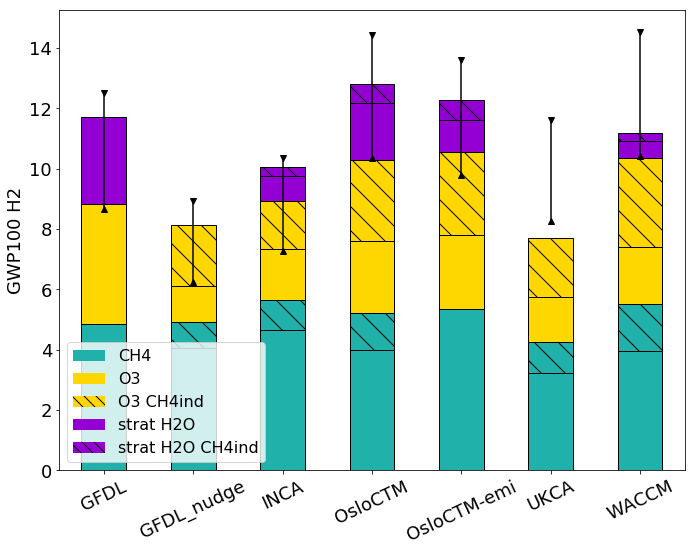

In [7]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        color=[CH4_color, CH4_color,O3_color, O3_color, H2O_color, H2O_color],
                        edgecolor='black',
                        ax=axs) 

for m,model in enumerate(df_table_gwp.columns):
    axs.plot(m,total_drydep80.loc[model],marker='^',color='black')
    axs.plot(m,total_drydep50.loc[model],marker='v',color='black')
    axs.plot([m,m],[total_drydep50.loc[model],total_drydep80.loc[model]],color='black')

bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
i = 0

for b,bar in enumerate(bars):    
    for p,patch in enumerate(bar):
        if b == 1 : 
            patch.set_hatch('\\')
        if b == 3 : 
            patch.set_hatch('\\')
        if b == 5 : 
            patch.set_hatch('\\')
        i = i + 1
axs.legend(handles = [CH4_legend, O3_dir_legend, O3_ind_legend, H2O_dir_legend, H2O_ind_legend])       
plt.ylabel('GWP100 H2')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()
plt.savefig('output/Hydrogen_GWP.png', transparent=True)

## Methane GWP
The same exercise is repeated for methane GWP, including also feedbacks through hydrogen. Here we include the AR6 values for methane GWP for comparison.

In [8]:
df_drydep80_table_gwp = pd.read_csv(filepath+'drydep_80_table_ch4_gwp.csv',index_col=0)
df_drydep80_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep50_table_gwp = pd.read_csv(filepath+'drydep_50_table_ch4_gwp.csv',index_col=0)
df_drydep50_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp = pd.read_csv(filepath+'table_ch4_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)

total_drydep80 = df_drydep80_table_gwp.sum()

total_drydep50 = df_drydep50_table_gwp.sum()


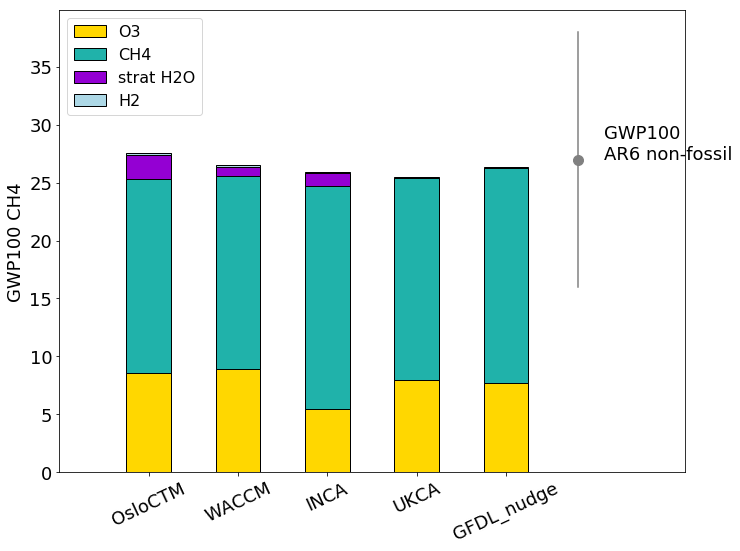

In [9]:
df_table_gwp = df_table_gwp.drop(['OsloCTM-emi','GFDL'],axis=1)

fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        color=[O3_color, CH4_color, H2O_color, H2_color],
                        #color={"O3": 'C1', "CH4": 'C2',"strat H2O":'C4',"H2":'C5'},
                        edgecolor='black',ax=axs) 
#It is the non-fossil GWP that is relevant to compare to.
#axs.plot([4.8,4.8],[29.8-11 ,29.8+11 ],color='black')
#axs.text(4.4,29.8,'GWP100 \nAR6 fossil')
axs.plot([4.8,4.8],[27.0-11 ,27.0+11 ],color='gray')
axs.plot(4.8,27.0,'o',markersize=10,color='gray')
axs.text(5.1,27.0,'GWP100 \nAR6 non-fossil')

plt.xlim([-1,6])
plt.ylabel('GWP100 CH4')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()    
plt.savefig('output/CH4_GWP.png', transparent=True)